# Maximum likelihood estimation (MLE)

In [1]:
# Importing libraries
import numpy as np
import scipy as sp
import pandas as pd
import lecroy
import os
from pathlib import Path
import sys
import json
from scipy.fft import rfft, irfft, rfftfreq
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# Global plot style settings
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["DejaVu Serif"],
    "mathtext.fontset": "cm",            # Use Computer Modern for math
    "font.size": 14,                     # Base font size
    "axes.labelsize": 16,                # Axis label font size
    "axes.titlesize": 16,                # Title font size
    "legend.fontsize": 13,               # Legend font size
    "xtick.labelsize": 13,               # X tick label size
    "ytick.labelsize": 13,               # Y tick label size
    "axes.linewidth": 1.2,               # Thicker axis lines
    "xtick.direction": "in",             # x-yick direction
    "ytick.direction": "in",             # y-tick direction
    "text.usetex": False,                # Enable LaTeX if needed
    "figure.dpi": 150,                   # Good resolution for screens
    "savefig.dpi": 300                   # High resolution for saving
})

In [2]:
# Define function for nice plotting
def PlotSettings(ax, gridlines=False, minimalist=False):
    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    # Minimalist style
    if minimalist:
        # Hide top and right spines (borders)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        # Ticks only on bottom and left
        ax.tick_params(which='both', top=False, right=False)
    else:
        # Tick parameters
        ax.tick_params(which='both', direction='in', top=True, right=True)
        ax.tick_params(which='major', length=7, width=1.2)
        ax.tick_params(which='minor', length=4, width=1)
    # Optional grid
    if gridlines:
        ax.grid(True, which="major", linestyle="--", linewidth=0.6, alpha=0.7)
        ax.grid(True, which="minor", linestyle=":", linewidth=0.5, alpha=0.4)

In [3]:
# Loading data
parent = Path(os.path.dirname(os.getcwd()))
date = "091027"
state = "tora12"

data_path = parent / "data" / "dataframes" / date
data = pd.read_csv(data_path / (state + '.csv'))
# Remove first column
data = data.iloc[:, 1:]
data

,000,015,030,045,060,075,090,105,120,135,150,165
0,-0.691680,0.063407,0.448135,-0.546981,0.366304,-1.322124,0.838883,-0.562779,-0.753950,-1.691413,-2.523955,-1.171703
1,0.365225,-1.257619,-1.149170,0.746818,-0.568017,-0.759022,0.838616,1.892820,-1.958064,-0.762912,-1.853347,-0.964380
2,-1.272027,1.373087,-1.136543,-1.136750,0.961795,-1.145283,0.703865,-0.533881,-1.099181,-1.626697,-1.724016,0.358023
3,-2.151074,0.226915,-1.843057,-0.596188,1.654879,-0.365160,-0.179112,-1.406542,-2.436749,0.067597,-0.468922,0.226967
4,-0.240855,-2.400535,-1.174751,-0.165467,-1.341006,-0.849466,-1.075215,0.095148,0.476726,-0.026314,-1.232597,-0.284955
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.933138,-0.652018,-0.002364,-0.493579,-1.008435,-0.891096,-1.470245,0.074555,0.713382,-1.000574,2.740520,-1.974758
29996,-1.547169,-1.571696,0.793214,-1.365816,-1.148177,0.365336,-0.939309,-1.244274,-2.030739,-0.999382,0.498205,-0.942209
29997,-1.683881,0.925357,1.084000,1.127135,-1.484083,-1.129278,-0.103388,-0.515619,-0.502222,-2.152910,1.191865,1.533904
29998,-1.096750,-1.534875,-1.610924,-0.216128,-0.354372,1.831465,-0.678462,-0.685848,-1.029428,-1.347423,-1.461209,-1.524816


In [4]:
# Get names of columns
column_names = data.columns.tolist()
column_names

['000',
 '015',
 '030',
 '045',
 '060',
 '075',
 '090',
 '105',
 '120',
 '135',
 '150',
 '165']

In [5]:
# Convert to numpy array
x_values = np.array(data)
x_values = np.swapaxes(x_values, 0, 1)

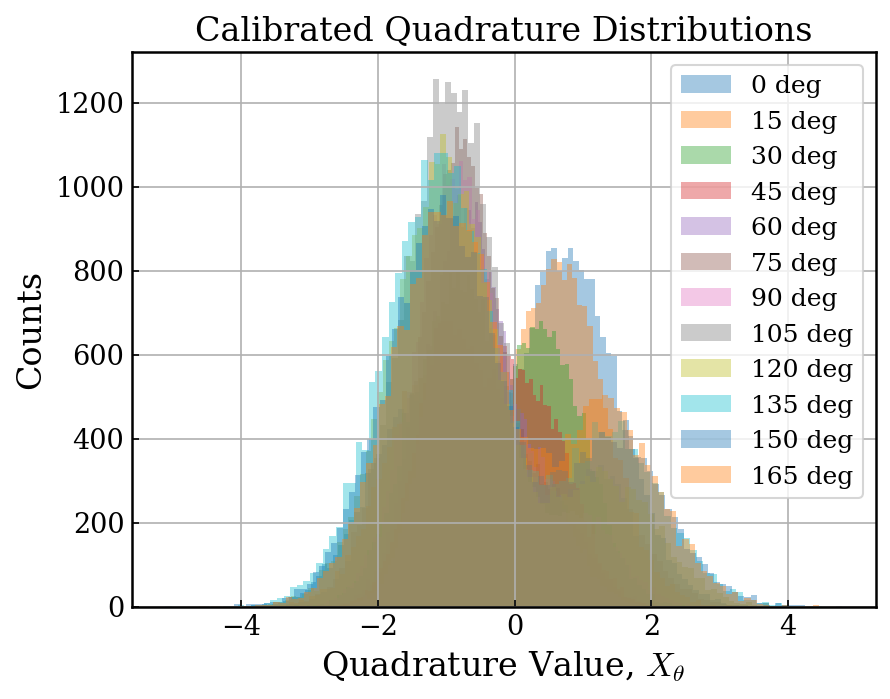

In [6]:
for i in range(12):
    plt.hist(x_values[i], bins=100, density=False, alpha=0.4, label=f"{15*i} deg")

plt.legend(fontsize=12)
plt.title("Calibrated Quadrature Distributions")
plt.xlabel("Quadrature Value, $X_\\theta$")
plt.ylabel("Counts")
plt.grid(True)
plt.show()

In [7]:
from iMLE import iMLE
from WignerDensity import rho_to_Wigner, Wigner_to_rho

In [8]:
# Make array from 0 to 165 in steps of 15
thetas = np.arange(0, 166, 15)
# Convert to radians
thetas = np.radians(thetas)
theta0 = np.deg2rad(55)
x0 = -0.1

theta0 = 0
x0 = 0

rho_est = iMLE(thetas-theta0, x_values-x0, N=20, num_bins=200, max_iters=400)


 59%|█████▉    | 235/400 [00:07<00:04, 33.09it/s]


KeyboardInterrupt: 

In [85]:
N = rho_est.shape[0]

# Make array from 0 to N in steps of 1
n_values = np.arange(0, N, 1)

diagonals = np.array([])

for i in range(N):
    diagonals = np.append(diagonals, np.real(rho_est[i, i]))
diagonals

array([3.55649473e-01, 4.65522830e-01, 1.05154838e-01, 4.86719966e-02,
       1.67194620e-02, 5.04078932e-03, 1.93845526e-03, 7.81021355e-04,
       2.77862517e-04, 1.30921143e-04, 5.42026982e-05, 2.87241379e-05,
       2.44694335e-06, 6.63945189e-06, 3.72042886e-06, 2.15595676e-06,
       3.02304160e-06, 9.03139558e-06, 8.10687286e-07, 1.59634872e-06])

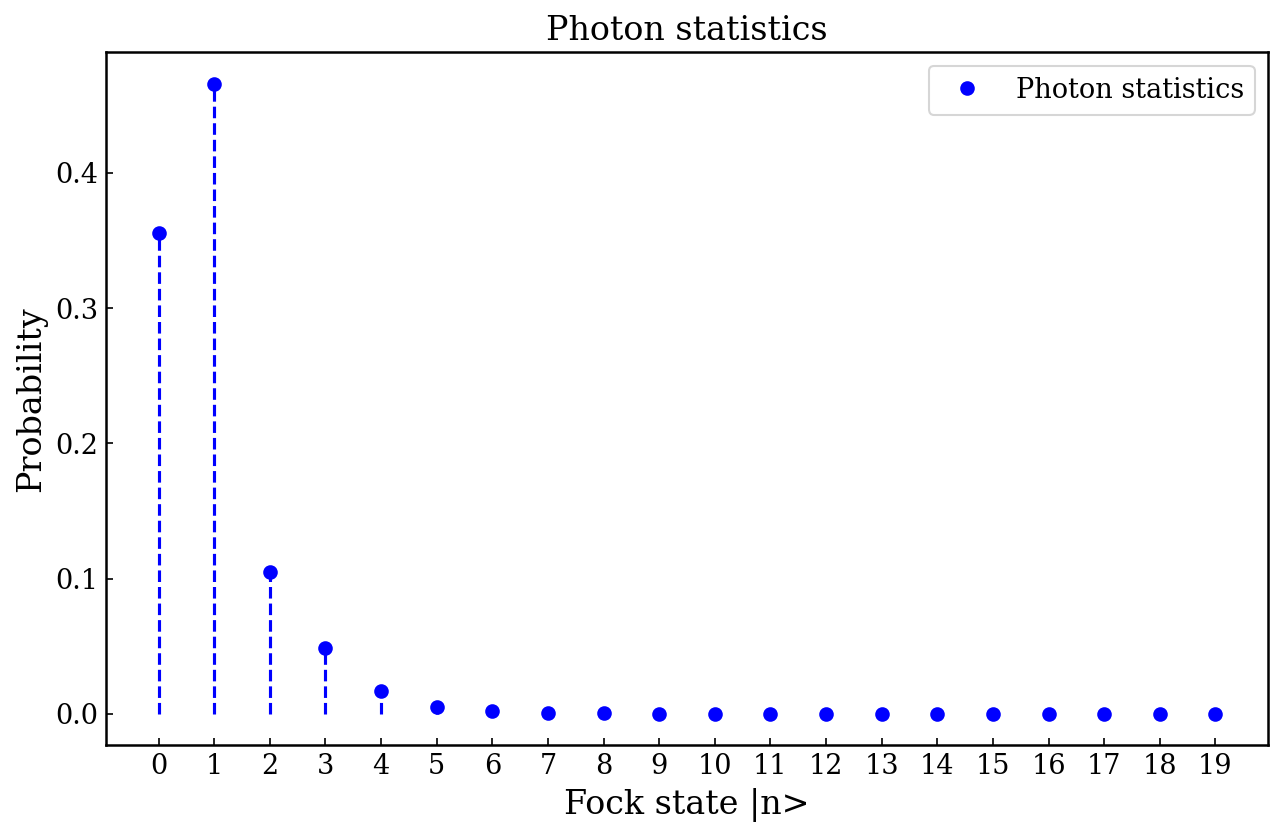

In [86]:
# Make plot of photon statistics
plt.figure(figsize=(10, 6))
for i in range(len(n_values)):
    plt.vlines(n_values[i], 0, diagonals[i], colors='blue', linestyles='dashed')

plt.plot(n_values, diagonals, 'o', color='blue', label='Photon statistics')
plt.xlabel('Fock state |n>')
plt.ylabel('Probability')
plt.title('Photon statistics')
plt.xticks(n_values)
plt.legend()
plt.show()

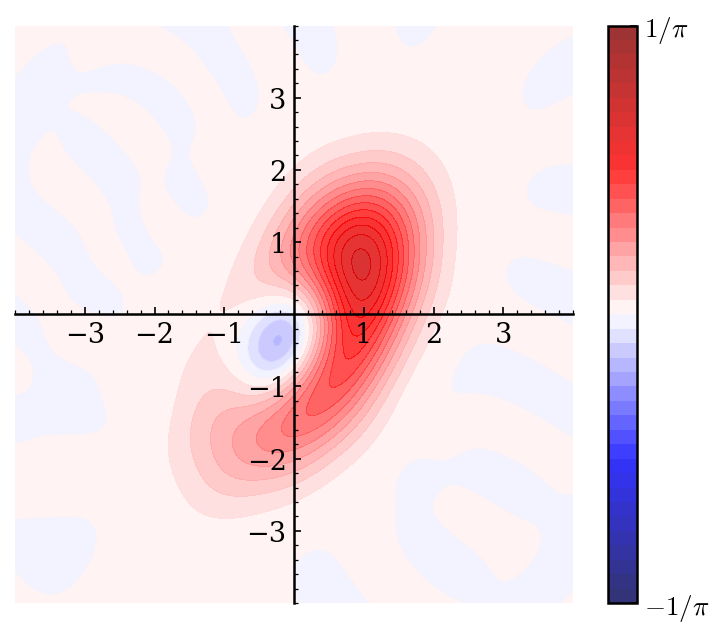

In [87]:
# Plot Wigner function
xvec = np.linspace(-4, 4, 200)
W = rho_to_Wigner(rho_est, xvec, xvec)
X, Y = np.meshgrid(xvec, xvec)
vmin, vmax = -1/np.pi, 1/np.pi
levels = np.linspace(vmin, vmax, 41)  # force levels across full range

fig, ax = plt.subplots(figsize=(6, 5))
# Filled contours with transparency
contour_filled = ax.contourf(X, Y, W, levels=levels,
                             cmap='seismic', alpha=0.8, vmin=vmin, vmax=vmax)
# Colorbar
cbar = fig.colorbar(contour_filled, ax=ax, ticks=[-1/np.pi, 1/np.pi])
cbar.ax.set_yticklabels([r"$-1/\pi$", r"$1/\pi$"])  # custom tick labels if needed
# Move axes to cross at (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Set x- and y-ticks skipping 0
ax.set_xticks([-3, -2, -1, 1, 2, 3])
ax.set_yticks([-3, -2, -1, 1, 2, 3])
PlotSettings(ax, minimalist=True)
plt.show()